## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.8246 - acc: 0.3468 - val_loss: 1.6946 - val_acc: 0.3971
Epoch 2/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.6017 - acc: 0.4316 - val_loss: 1.7059 - val_acc: 0.3932
Epoch 3/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.5191 - acc: 0.4601 - val_loss: 1.6960 - val_acc: 0.4150
Epoch 4/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.4510 - acc: 0.4835 - val_loss: 1.6121 - val_acc: 0.4407
Epoch 5/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.4063 - acc: 0.5004 - val_loss: 1.4669 - val_acc: 0.4754
Epoch 6/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.3641 - acc: 0.5161 - val_loss: 1.4586 - val_acc: 0.4959
Epoch 7/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.3300 - acc: 0.5281 - val_loss: 1.4455 - 

Epoch 2/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.8261 - acc: 0.3576 - val_loss: 1.7768 - val_acc: 0.3720
Epoch 3/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.7407 - acc: 0.3864 - val_loss: 1.7144 - val_acc: 0.3942
Epoch 4/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.6803 - acc: 0.4097 - val_loss: 1.6511 - val_acc: 0.4224
Epoch 5/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.6303 - acc: 0.4288 - val_loss: 1.6233 - val_acc: 0.4321
Epoch 6/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.5887 - acc: 0.4436 - val_loss: 1.6015 - val_acc: 0.4299
Epoch 7/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.5556 - acc: 0.4541 - val_loss: 1.5613 - val_acc: 0.4464
Epoch 8/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.5254 - acc: 0.4644 - val_loss: 1.5399 - val_acc: 0.4568
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 8s 164us/step - loss: 2.2482 - acc: 0.1760 - val_loss: 2.2397 - val_acc: 0.1844
Epoch 5/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.2319 - acc: 0.1913 - val_loss: 2.2243 - val_acc: 0.1976
Epoch 6/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.2173 - acc: 0.2028 - val_loss: 2.2103 - val_acc: 0.2066
Epoch 7/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.2038 - acc: 0.2121 - val_loss: 2.1972 - val_acc: 0.2137
Epoch 8/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.1911 - acc: 0.2195 - val_loss: 2.1847 - val_acc: 0.2253
Epoch 9/50
50000/50000 [==============================] - 8s 163us/step - loss: 2.1791 - acc: 0.2268 - val_loss: 2.1730 - val_acc: 0.2338
Epoch 10/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.1676 - acc: 0.2359 - val_loss: 2.1619 - val_acc: 0.2382
Epoch 11/50
50000/50000 [===================

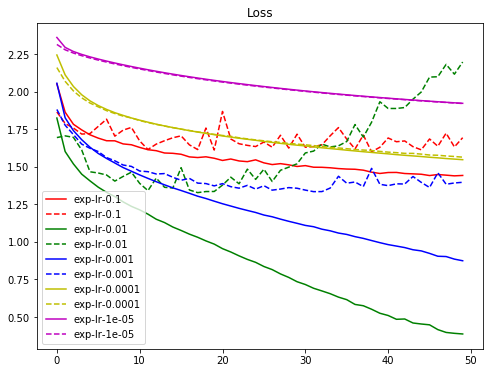

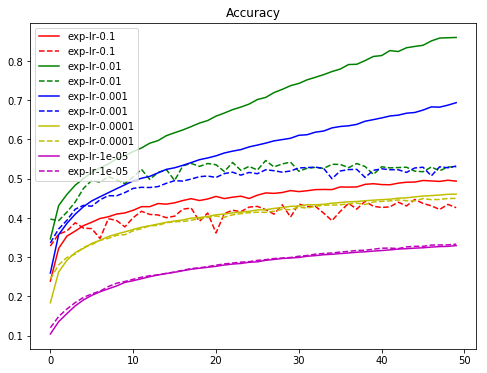

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 

In [9]:
## 超參數設定
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [1, 0.1, 0.5, 0.95]

results = {}
"""
使用迴圈，建立不同 MOMENTUM 的模型並訓練
"""
for beta in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (beta))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=beta)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    MOMENTUM_tag = "MOMENTUM_tagr-%s" % str(beta)
    results[MOMENTUM_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MOMENTUM = 1.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 170us/step - loss: 2.0443 - acc: 0.2681 - val_loss: 1.9150 - val_acc: 0.3312
Epoch 2/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.8635 - acc: 0.3401 - val_loss: 1.8859 - val_acc: 0.3059
Epoch 3/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.7964 - acc: 0.3641 - val_loss: 1.8126 - val_acc: 0.3551
Epoch 4/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.7518 - acc: 0.3811 - val_loss: 1.9129 - val_acc: 0.3419
Epoch 5/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.7126 - acc: 0.3955 - val_loss: 1.7084 - val_acc: 0.3936
Epoch 6/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.6808 - acc: 0.4059 - val_loss: 1.6790 - val_acc: 0.4115
Epoch 7/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.6592 - acc: 0.4161 - val_loss: 1.6615 - 

Epoch 2/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.8146 - acc: 0.3612 - val_loss: 1.8575 - val_acc: 0.3269
Epoch 3/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.7448 - acc: 0.3826 - val_loss: 1.7947 - val_acc: 0.3669
Epoch 4/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.6908 - acc: 0.4041 - val_loss: 1.8570 - val_acc: 0.3536
Epoch 5/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.6535 - acc: 0.4146 - val_loss: 1.6768 - val_acc: 0.4036
Epoch 6/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.6181 - acc: 0.4304 - val_loss: 1.6142 - val_acc: 0.4254
Epoch 7/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.5865 - acc: 0.4411 - val_loss: 1.7452 - val_acc: 0.3897
Epoch 8/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.5611 - acc: 0.4502 - val_loss: 1.6555 - val_acc: 0.3978
Epoch 9/50
50000/50000 [==========

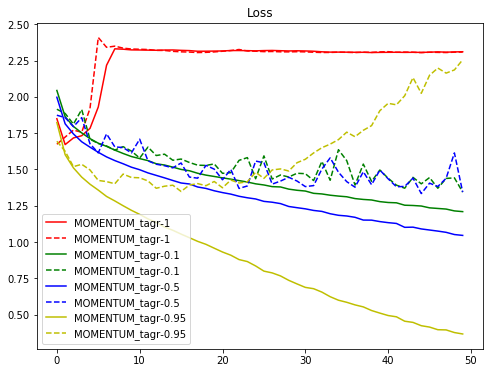

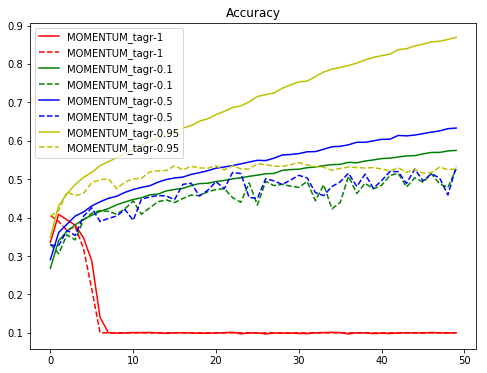

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

不使用 nesterov 的表現:訓練時的震盪比較大

In [5]:
## 超參數設定
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [1, 0.1, 0.5, 0.95]

results = {}
"""
使用迴圈，建立不同 MOMENTUM 的模型並訓練
"""
for beta in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (beta))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=beta)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    MOMENTUM_tag = "MOMENTUM_tagr-%s" % str(beta)
    results[MOMENTUM_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MOMENTUM = 1.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 166us/step - loss: 2.0495 - acc: 0.2637 - val_loss: 1.9716 - val_acc: 0.2921
Epoch 2/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.8580 - acc: 0.3469 - val_loss: 1.8444 - val_acc: 0.3413
Epoch 3/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.7930 - acc: 0.3707 - val_loss: 1.7749 - val_acc: 0.3558
Epoch 4/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.7415 - acc: 0.3862 - val_loss: 1.8133 - val_acc: 0.3535
Epoch 5/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.7025 - acc: 0.4024 - val_loss: 1.7159 - val_acc: 0.3881
Epoch 6/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.6745 - acc: 0.4099 - val_loss: 1.8125 - val_acc: 0.3532
Epoch 7/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.6538 - acc: 0.4194 - val_loss: 1.7070 - 

Epoch 2/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.8072 - acc: 0.3622 - val_loss: 1.7789 - val_acc: 0.3754
Epoch 3/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.7315 - acc: 0.3871 - val_loss: 1.7034 - val_acc: 0.4024
Epoch 4/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.6748 - acc: 0.4099 - val_loss: 1.6587 - val_acc: 0.4159
Epoch 5/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.6320 - acc: 0.4246 - val_loss: 1.6442 - val_acc: 0.4148
Epoch 6/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.5951 - acc: 0.4384 - val_loss: 1.6467 - val_acc: 0.4137
Epoch 7/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.5688 - acc: 0.4456 - val_loss: 1.5614 - val_acc: 0.4488
Epoch 8/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.5416 - acc: 0.4557 - val_loss: 1.5810 - val_acc: 0.4351
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 8s 162us/step - loss: 1.5984 - acc: 0.4275 - val_loss: 1.5671 - val_acc: 0.4438
Epoch 4/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.5313 - acc: 0.4548 - val_loss: 1.5013 - val_acc: 0.4654
Epoch 5/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.4862 - acc: 0.4710 - val_loss: 1.5231 - val_acc: 0.4556
Epoch 6/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.4565 - acc: 0.4804 - val_loss: 1.5396 - val_acc: 0.4483
Epoch 7/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.4375 - acc: 0.4863 - val_loss: 1.4909 - val_acc: 0.4728
Epoch 8/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.3986 - acc: 0.5007 - val_loss: 1.4605 - val_acc: 0.4788
Epoch 9/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.3633 - acc: 0.5153 - val_loss: 1.4091 - val_acc: 0.4937
Epoch 10/50
50000/50000 [====================

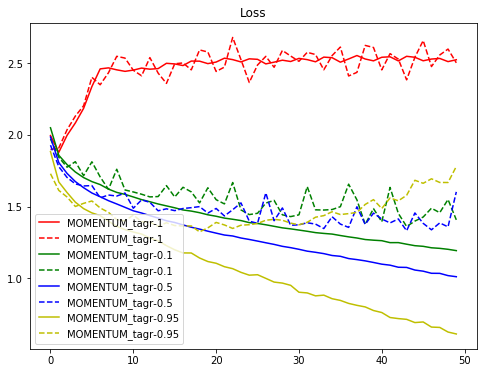

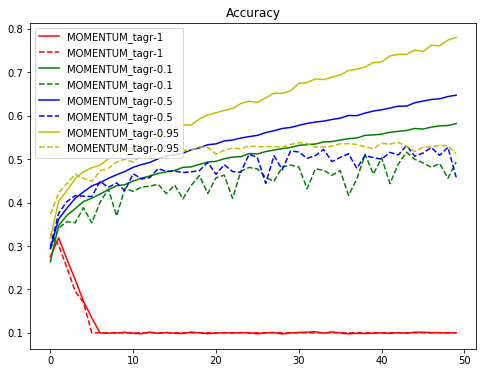

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()